<a href="https://colab.research.google.com/github/am21s088/ML/blob/main/Decision_Tree_%26_Random_Forest_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn_df_train = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-80.csv')
churn_df_test = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-20.csv')

##### Data Manipulation

In [ ]:
churn_df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
churn_df_train.isnull().sum()
churn_df_test.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
churn_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

##### Handling Categorical Values
    * Must be converted to numerical labels using label encoder, one-hot encoding.
    * label Encoder is used for mapping categorical values to 0,1,2,3,4...

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
churn_df_train['International plan'] = le_encoder.fit_transform(churn_df_train['International plan'])
churn_df_test['International plan'] = le_encoder.transform(churn_df_test['International plan'])

In [ ]:
churn_df_train['Voice mail plan'] = le_encoder.fit_transform(churn_df_train['Voice mail plan'])
churn_df_test['Voice mail plan'] = le_encoder.transform(churn_df_test['Voice mail plan'])

In [ ]:
churn_df_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


#### Correlation

<ipython-input-9-9f68c3459022>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_df_train.corr(), annot = True)


<Axes: >

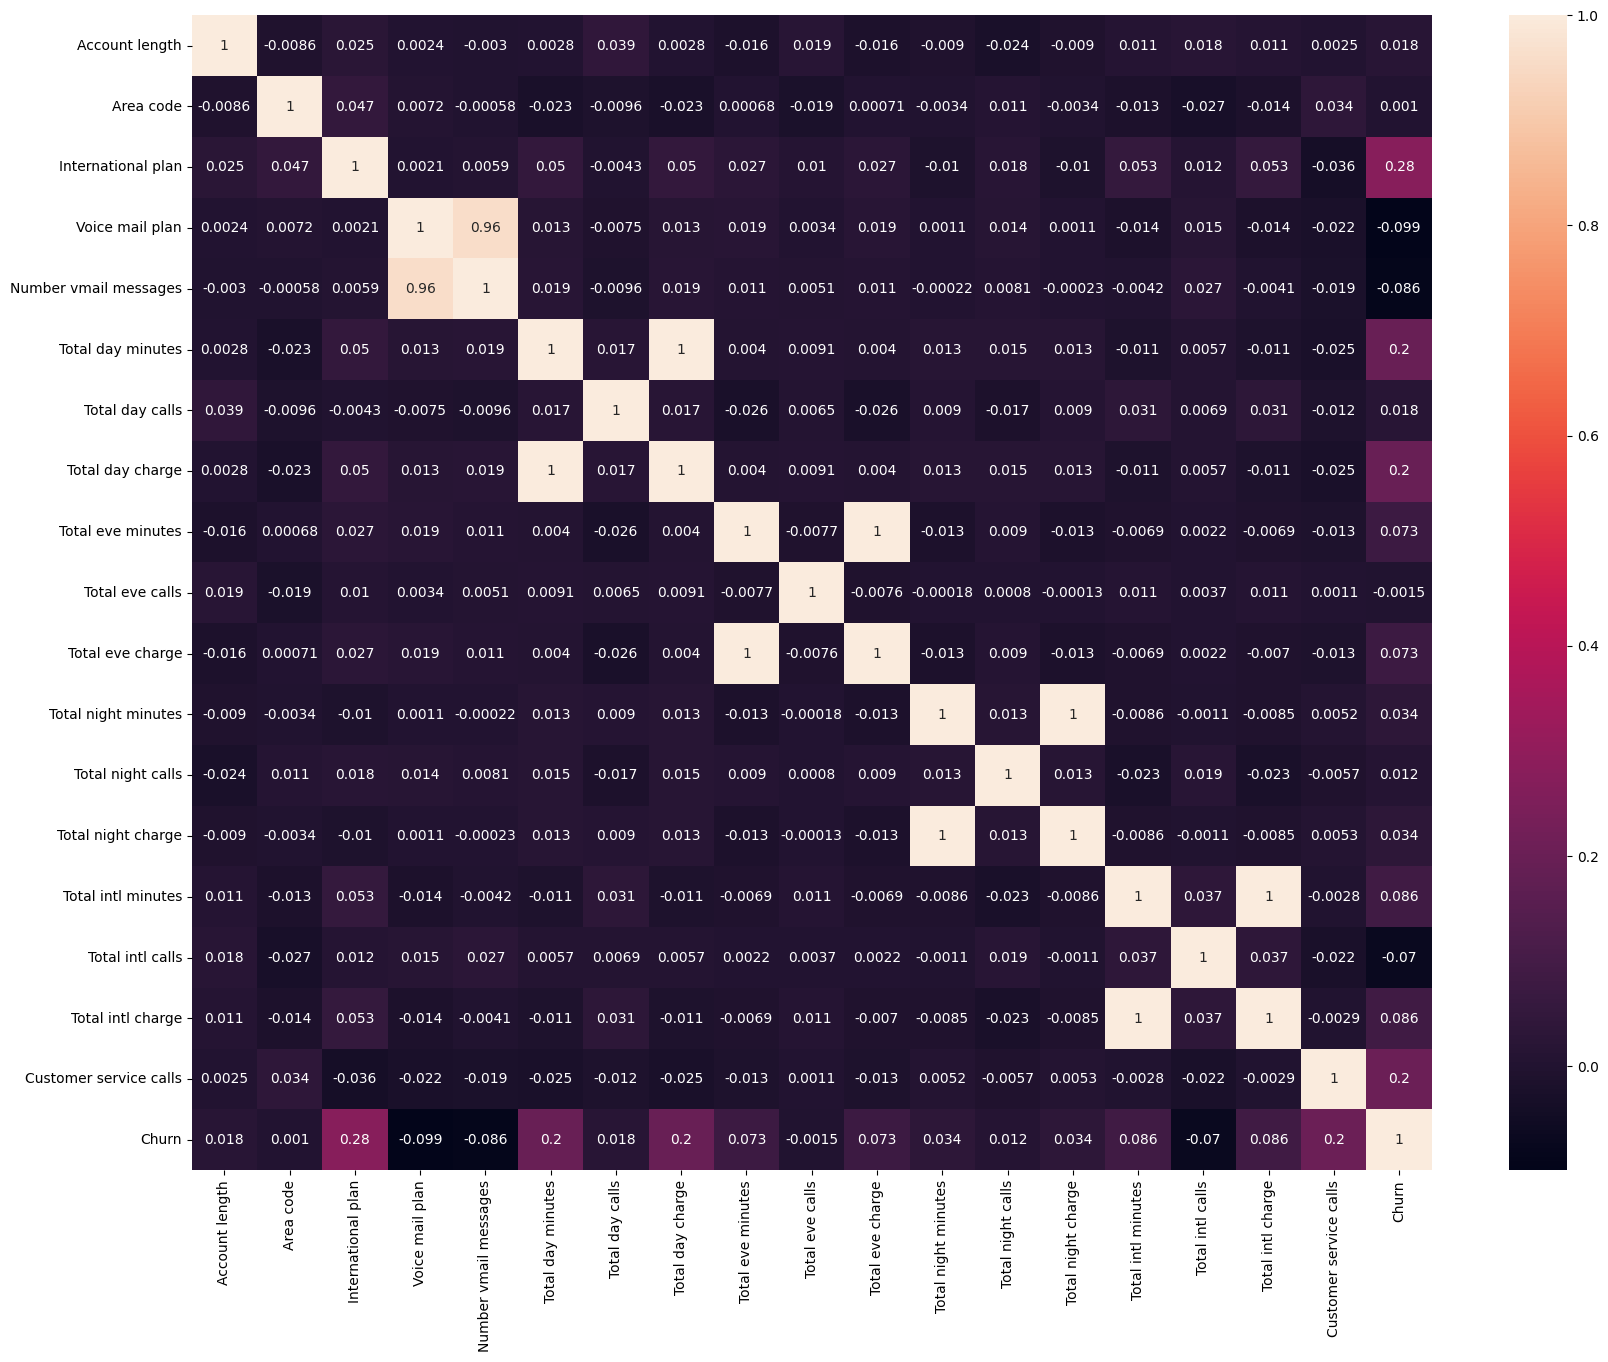

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(churn_df_train.corr(), annot = True)

##### Imabalanced class Data

<Axes: xlabel='Churn', ylabel='count'>

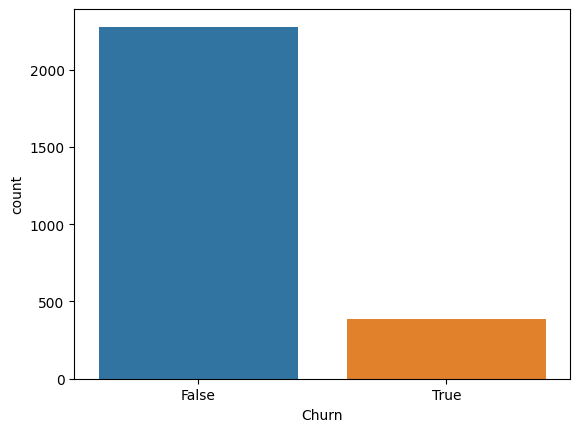

In [ ]:
sns.countplot(x = 'Churn', data = churn_df_train)

##### Data Augmentation

    * To regenerate input data for training samples.

In [ ]:
churn_df_train['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [ ]:
from sklearn.utils import resample
df_0 = churn_df_train[churn_df_train['Churn'] == False]
df_1 = churn_df_train[churn_df_train['Churn'] == True]

In [ ]:
df_1_upsample = resample(df_1, n_samples = 1139, replace = True, random_state = 123)

In [ ]:
# SMOTE - Imbalanced Class, Class_weights
churn_df_train1 = pd.concat([df_0, df_1_upsample])

In [ ]:
churn_df_train1['Churn'].value_counts() / len(churn_df_train1['Churn'])

False    0.666667
True     0.333333
Name: Churn, dtype: float64

##### Features & Target

In [ ]:
churn_df_train1.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
X = churn_df_train1.drop(['State','Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge',
                          'Churn'], axis = 1)
Y = churn_df_train1['Churn']

In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,141,415,0,1,322.4,92,283.2,107,209.5,111,6.7,3,1
268,86,415,0,0,128.3,121,197.1,93,138.4,152,12.2,5,7
1300,116,408,0,0,159.4,79,179.5,88,167.8,71,9.7,2,6
1775,71,415,0,0,278.9,110,190.2,67,255.2,84,11.7,7,0


##### Train & Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# random_state = 0-11
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

##### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# criterion = 'entropy' or 'gini', class_weight = label1:label %, label2:label %, max_depth = post pruning with value = 10
clf_tree = DecisionTreeClassifier(criterion='entropy', class_weight = {0:66.67, 1: 33.33}, max_depth = 10)

In [ ]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 66.67, 1: 33.33}, criterion='entropy',
                       max_depth=10)

In [ ]:
clf_tree.score(x_test, y_test)

0.9488304093567251

In [ ]:
clf_tree.score(x_train, y_train)

0.9623124771313575

In [ ]:
clf_tree.get_depth()

10

##### Plot Decision Tree

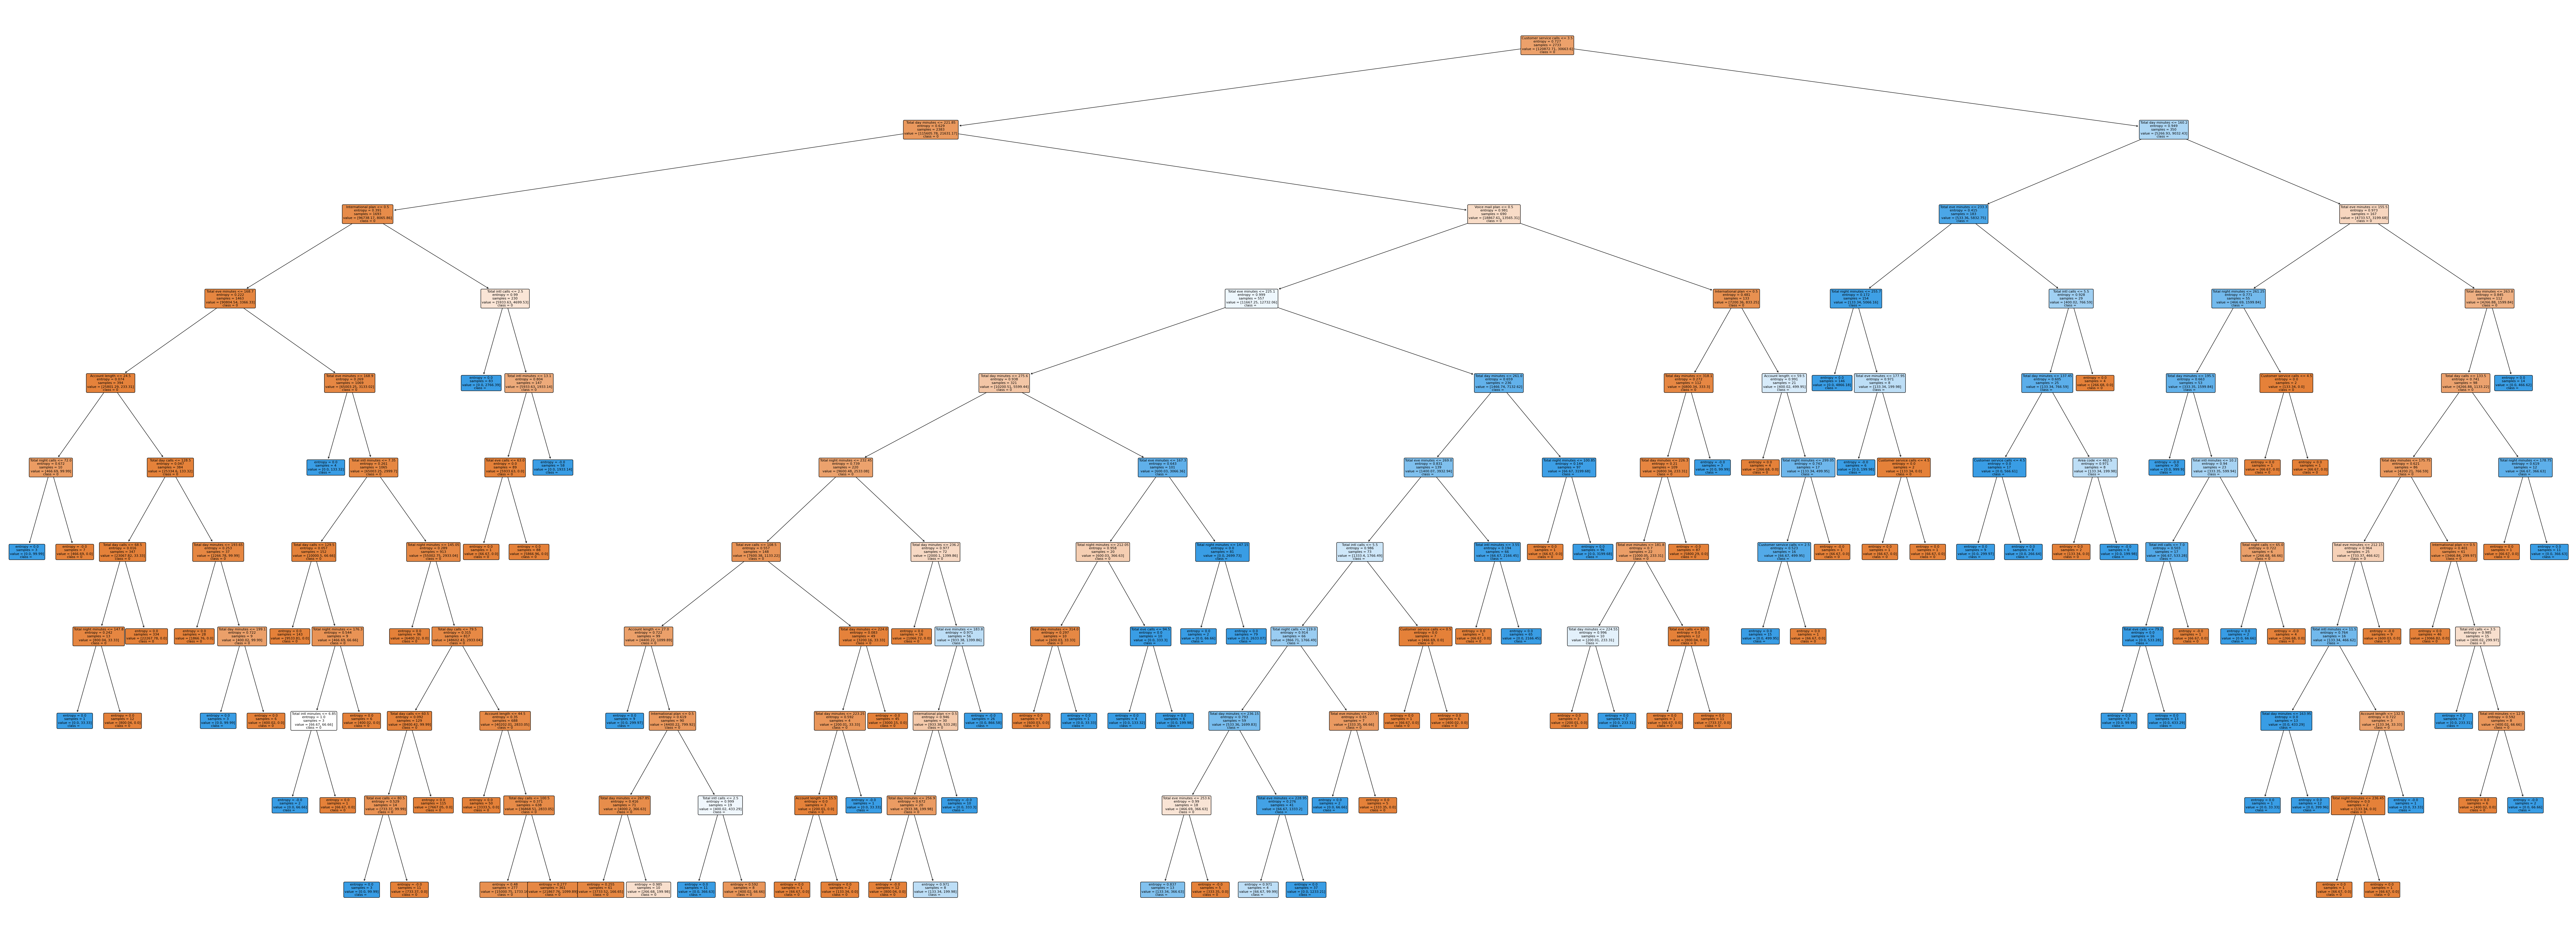

In [ ]:
from sklearn import tree
fig = plt.figure(figsize = (110,40))
_ = tree.plot_tree(clf_tree, feature_names
                  = X.columns, class_names = str(churn_df_train1.Churn), filled = True,
                   rounded = True, fontsize = 8)

##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# bootstrap = random sampling of existing features, n_estimators = Number of Decision Trees, max_features = 8 features
clf_rf = RandomForestClassifier(bootstrap = True, n_estimators = 100, criterion = 'entropy', max_depth = 10, max_features = 8)

In [ ]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=8)

In [ ]:
clf_rf.score(x_train, y_train)

0.9732894255397

In [ ]:
clf_rf.score(x_test, y_test)

0.9605263157894737

In [ ]:
predictions = clf_rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions)

array([[457,   8],
       [ 19, 200]])

<Axes: >

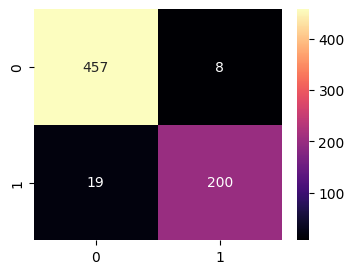

In [ ]:
plt.figure(figsize = (4,3))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='magma', fmt = '0.0f')

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       465
        True       0.96      0.91      0.94       219

    accuracy                           0.96       684
   macro avg       0.96      0.95      0.95       684
weighted avg       0.96      0.96      0.96       684



In [ ]:
x_val = churn_df_test.drop(['State','Number vmail messages','Total day charge','Total eve charge','Total night charge','Total intl charge',
                          'Churn'], axis = 1)
y_val = churn_df_test['Churn']

In [ ]:
predictions = clf_rf.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_val, predictions)

array([[560,  12],
       [ 20,  75]])

In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       572
        True       0.86      0.79      0.82        95

    accuracy                           0.95       667
   macro avg       0.91      0.88      0.90       667
weighted avg       0.95      0.95      0.95       667

